# Final Project DTS FGA Big Data Analytics

<i>Oleh: Muhammad Adam Fahmil 'Ilmi, S.Kom.</i>

## Dataset

Dataset yang didapatkan adalah <b>Data Cuaca Istanbul, Turki Tahun 2009-2019</b> yang bersumber dari https://www.kaggle.com/vonline9/weather-istanbul-data-20092019. Dataset ini berisi tentang informasi cuaca harian Istanbul mulai dari 1 Januari 2009 hingga 22 Juli 2019.<br>
Dataset ini memiliki fitur-fitur, antara lain:<br>
<ul>
    <li>DateTime: Tanggal dilakukan perekaman data</li>
    <li>Condition: Kondisi cuaca saat ini</li>
    <li>Rain: Curah hujan di siang hari (mm)</li>
    <li>SunRise: Waktu matahari terbit (time)</li>
    <li>SunSet: Waktu matahari terbenam (time)</li>
    <li>MoonRise: Waktu bulan terbit (time)</li>
    <li>MoonSet: Waktu bulan terbenam (time)</li>
    <li>AvgWind: Kecepatan angin rata-rata pada hari itu (km/h)</li>
    <li>AvgHumidity: Kelembaban rata-rata pada siang hari (percent)</li>
    <li>AvgPressure: Tekanan udara rata-rata pada hari itu (mb)</li>
</ul>

In [1]:
# load dataset

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

fileFo = "Istanbul Weather Data.csv"
data = pd.read_csv(fileFo)

nRow, nCol = data.shape
print(f'"Dataset Istanbul Weather 2009-2019" memiliki {nRow} baris and {nCol} kolom')

data.head()

"Dataset Istanbul Weather 2009-2019" memiliki 3854 baris and 12 kolom


,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,22.07.2019,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017
1,21.07.2019,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018
2,20.07.2019,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016
3,19.07.2019,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014
4,18.07.2019,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010


In [3]:
# mengecek tipe data, jumlah row, dll

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 12 columns):
DateTime       3854 non-null object
Condition      3854 non-null object
Rain           3854 non-null float64
MaxTemp        3854 non-null int64
MinTemp        3854 non-null int64
SunRise        3854 non-null object
SunSet         3854 non-null object
MoonRise       3724 non-null object
MoonSet        3724 non-null object
AvgWind        3854 non-null int64
AvgHumidity    3854 non-null int64
AvgPressure    3854 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 361.4+ KB


## Preprocessing

Di bawah ini merupakan proses mengubah fitur "DateTime" menjadi format datetime, lalu data DateTime tersebut dijadikan index pada dataframe (dataset). Mengapa dilakukan seperti ini? Hal ini karena dataset ini berjenis <i>time-series dataset</i>, dimana data "waktu" digunakan sebagai fitur yang menjadi acuan dalam <i>time-series dataset</i>.

In [4]:
# mengubah data DateTime menjadi format datetime
# lalu data DateTime dijadikan index pada dataframe

import datetime

data_prepro = data
tanggal = []

for tgl in data['DateTime']:
    temp = datetime.datetime.strptime(tgl, '%d.%m.%Y')
    tanggal.append(temp)

data_prepro['DateTime'] = tanggal
data_prepro.set_index('DateTime', inplace=True)
data_prepro.head()

,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
DateTime,,,,,,,,,,,
2019-07-22,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017
2019-07-21,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018
2019-07-20,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016
2019-07-19,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014
2019-07-18,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010


Tahap selanjutnya dari Preprocessing Data adalah penanganan missing values, yaitu tahap yang dilakukan untuk menangani data yang hilang dari dataset. Salah satu cara penanganannya adalah dengan menghapus baris yang terdapat <i>missing values</i> tersebut.

In [5]:
# menghilangkan data NaN (missing values)

data_prepro = data_prepro.dropna()
print("Ukuran data (baris, kolom):", data_prepro.shape)
data_prepro.head()

Ukuran data (baris, kolom): (3594, 11)


,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
DateTime,,,,,,,,,,,
2019-07-22,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017
2019-07-21,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018
2019-07-20,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016
2019-07-19,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014
2019-07-18,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) merupakan sebuah pendekatan dalam proses analisis dataset untuk merangkum karakteristiknya, seringnya menggunakan metode visualisasi. Hal ini merupakan praktik yang baik untuk memahami data terlebih dahulu dan mencoba mengumpulkan sebanyak mungkin wawasan darinya.<br>
(https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

### Visualisasi Data

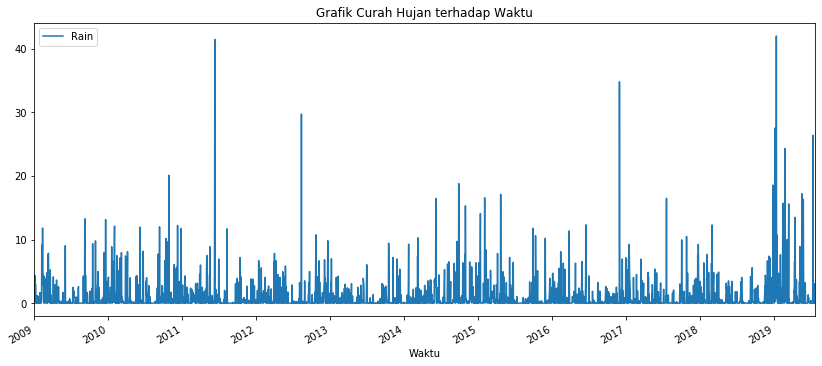

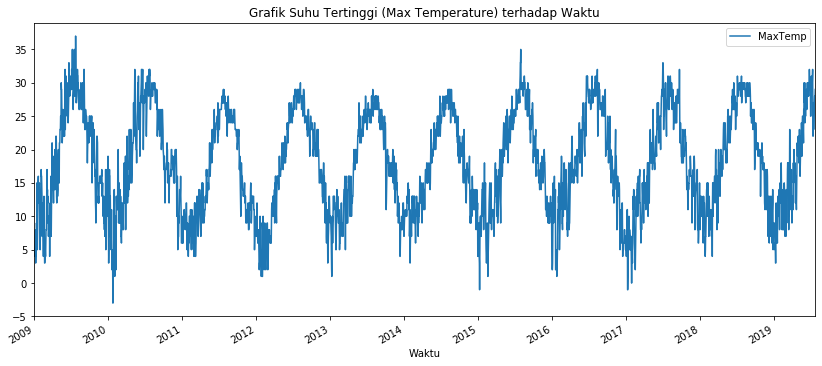

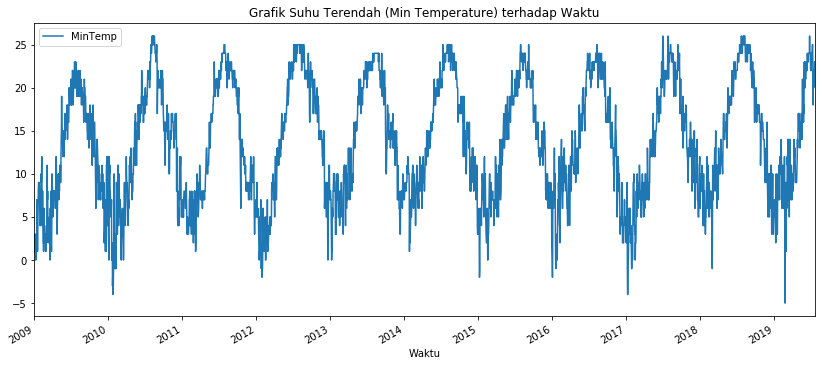

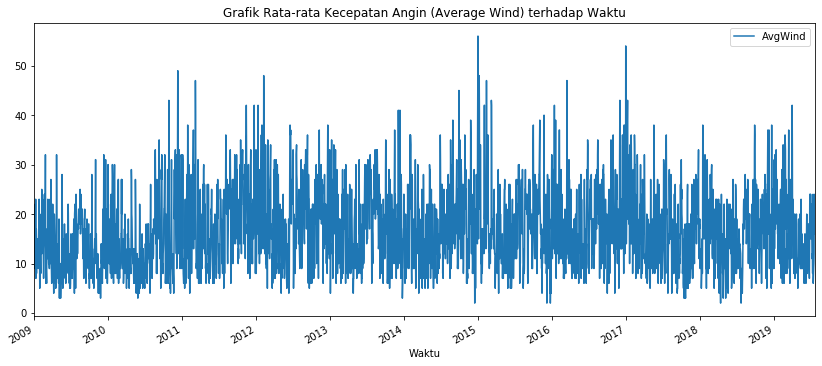

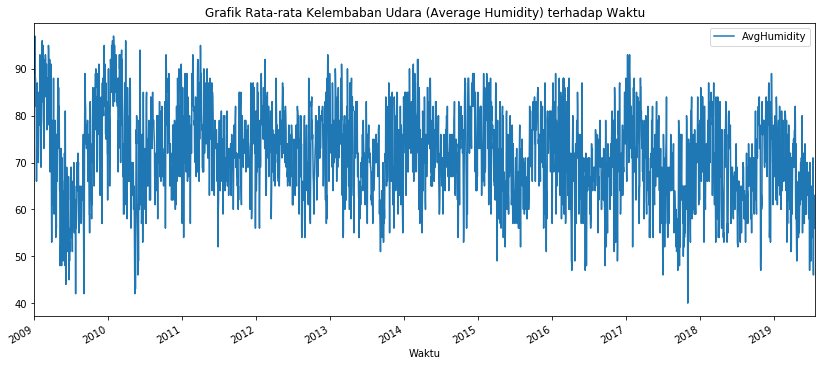

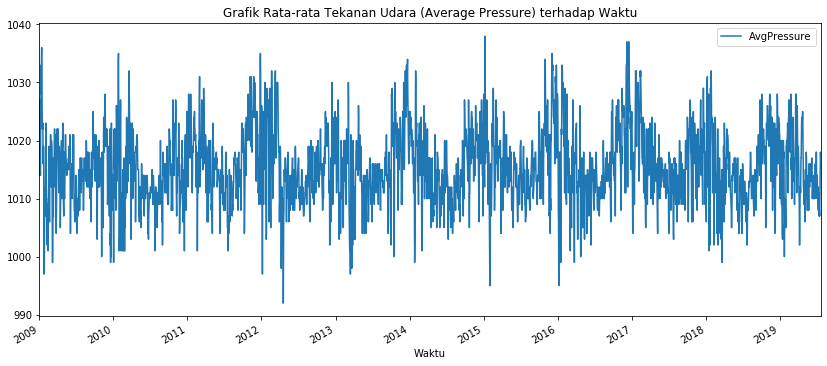

In [6]:
## visualisasi masing-masing fitur terhadap waktu

# import
import matplotlib.pyplot as plt

# Rain terhadap Waktu
data_prepro[['Rain']].plot(figsize=(14,6))
plt.title('Grafik Curah Hujan terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# MaxTemp terhadap Waktu
data_prepro[['MaxTemp']].plot(figsize=(14,6))
plt.title('Grafik Suhu Tertinggi (Max Temperature) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# MinTemp terhadap Waktu
data_prepro[['MinTemp']].plot(figsize=(14,6))
plt.title('Grafik Suhu Terendah (Min Temperature) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# AvgWind terhadap Waktu
data_prepro[['AvgWind']].plot(figsize=(14,6))
plt.title('Grafik Rata-rata Kecepatan Angin (Average Wind) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# AvgHumidity terhadap Waktu
data_prepro[['AvgHumidity']].plot(figsize=(14,6))
plt.title('Grafik Rata-rata Kelembaban Udara (Average Humidity) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

# AvgPressure terhadap Waktu
data_prepro[['AvgPressure']].plot(figsize=(14,6))
plt.title('Grafik Rata-rata Tekanan Udara (Average Pressure) terhadap Waktu')
plt.xlabel('Waktu')
plt.show()

Hal pertama yang perlu diperhatikan adalah adanya musim (<i>seasonality</i>): setiap awal tahun, ada lompatan besar. Juga, tampaknya ada tren (<i>trends</i>): tampaknya naik sedikit, lalu turun, kembali naik dan turun kembali. Dengan kata lain, sepertinya ada tren dan komponen musiman untuk rangkaian waktu tersebut.

### Korelasi

Untuk mencari korelasi antarfitur dalam dataset, bisa dilakukan plotting menggunakan scatter plot.

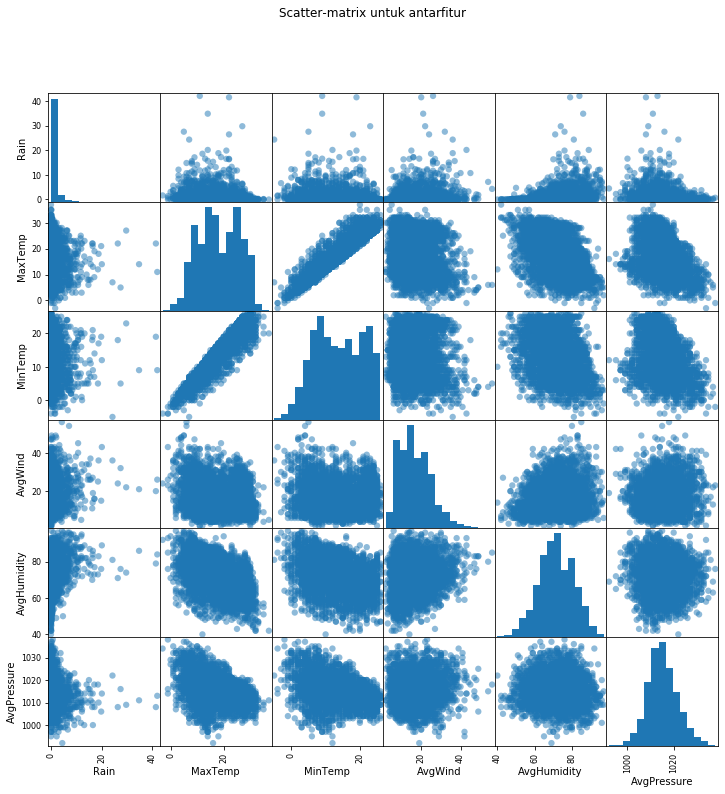

In [7]:
## visualisasi korelasi antarfitur

# import
from pandas.plotting import scatter_matrix
from matplotlib import cm
import matplotlib.pyplot as plt

X = data_prepro[['Rain','MaxTemp','MinTemp','AvgWind','AvgHumidity','AvgPressure']]
Y = data_prepro[['Condition']]

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, marker='o', s=40,
                        hist_kwds={'bins':15}, figsize=(12,12),
                        cmap=cmap)

plt.suptitle('Scatter-matrix untuk antarfitur')
plt.savefig('data_scatter_matrix')


Untuk mencari korelasi antarfitur dalam dataset, bisa menggunakan HeatMap dari <i>correlation coefisient</i>

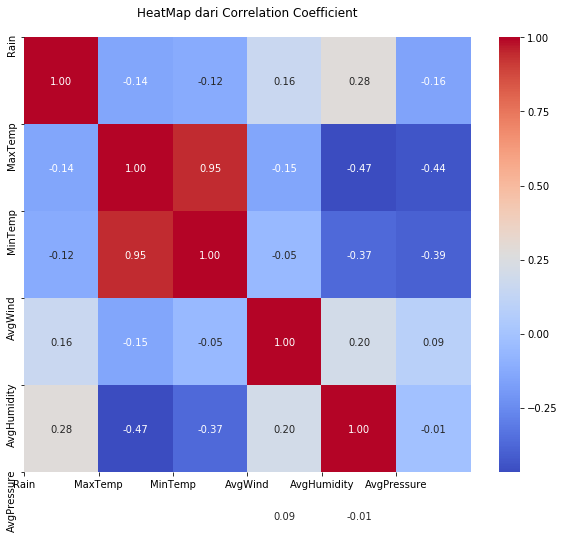

In [8]:
# mencari correlation coeficient

import seaborn as sns
import matplotlib.pyplot as plt

corr = data_prepro[['Rain','MaxTemp','MinTemp','AvgWind','AvgHumidity','AvgPressure']].corr()
fig, ax = plt.subplots(figsize=(10, 8)) # Ukuran grafik

# Membuat Heat Map, yang bisa diberi anotasi dan nilai
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns) # Memberi label X
plt.yticks(range(len(corr.columns)), corr.columns) # Memberi label Y
plt.title("HeatMap dari Correlation Coefficient\n")

plt.show()

Tujuan dilakukannya visualisasi di atas adalah untuk melihat korelasi antarfitur. Selain itu, dibantu menggunakan tabel <i>correlation</i> yang memuat nilai antarfitur. Nilai dari tabel korelasi memiliki rentang nilai dari 0 hingga 1, dimana nilai 0 menandakan bahwa tidak ada korelasi, sedangkan nilai 1 menandakan bahwa ada korelasi yang kuat.
Berdasarkan tabel korelasi dan visualisasi <i>correlation</i> di atas, maka dapat diambil dua fitur yang memiliki dugaan kuat ada korelasi, yaitu antara fitur 'MaxTemp' dengan 'MinTemp' sebesar 0.95.

### Statistik Deskriptif

In [9]:
display(data_prepro[['MaxTemp']].describe())
display(data_prepro[['MinTemp']].describe())

,MaxTemp
count,3594.000000
mean,17.989149
std,7.571839
min,-3.000000
25%,12.000000
50%,18.000000
75%,25.000000
max,37.000000


,MinTemp
count,3594.000000
mean,13.689482
std,6.817355
min,-5.000000
25%,8.000000
50%,14.000000
75%,20.000000
max,26.000000


## Analisis Regresi

Untuk data yang akan dilakukan proses analisis regresi adalah fitur-fitur yang memiliki nilai <i>correlation coeficient</i> paling tinggi di antara yang lain. Sebagaimana kesimpulan dari analisis sebelumnya bahwa antara fitur 'MaxTemp' dan 'MinTemp' memiliki korelasi yang paling tinggi di antara yang lain.<br>
Berikut ini tampilan scatter plot dari hubungan antara 'MaxTemp' dengan 'MinTemp'.

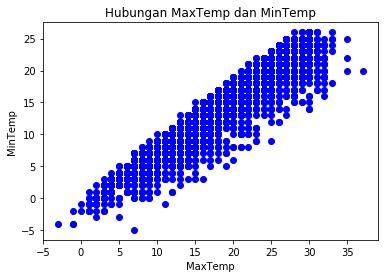

In [10]:
x = data_prepro['MaxTemp']
y = data_prepro['MinTemp']

x_data = x
y_data = y

plt.plot(x,y,"bo")
plt.title("Hubungan MaxTemp dan MinTemp")
plt.ylabel("MinTemp")
plt.xlabel("MaxTemp")
plt.show()

### Regresi Linier

In [11]:
# import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import numpy as np

# melakukan setting random dengan seed 0
np.random.seed(0)

# data
x = data_prepro['MaxTemp']
y = data_prepro['MinTemp']

# normalisasi data
Xdata = x/max(x)
Ydata = y/max(y)

# Membagi data menjadi training set (80%) dan testing set (20%)
msk = np.random.rand(len(x)) < 0.8

train_x = np.array(Xdata[msk]).reshape(-1,1)
test_x = np.array(Xdata[~msk]).reshape(-1,1)
train_y = np.array(Ydata[msk]).reshape(-1,1)
test_y = np.array(Ydata[~msk]).reshape(-1,1)

model = LinearRegression()
model.fit(train_x,train_y)

intercept = model.intercept_        # Menghitung Intersepsi (b0)
slope = model.coef_[0]              # Menghitung Slop (b1)
r_sq = model.score(train_x,train_y) # Menghitung hubungan variabel x dan y

pred_y = model.predict(test_x)

print('Intercept (Beta_0): {:0.2f}'.format(intercept[0]))
print('Slope (Beta_1)    : {:0.2f}'.format(slope[0]))
print('R-2 score         : {:0.2f}'.format(r_sq))

mae = mean_absolute_error(test_y, pred_y)  
mse = mean_squared_error(test_y, pred_y)
rmse = math.sqrt(mse)

# hasil disimpan pada dataframe
regresi = pd.DataFrame() # Membuat dataframe untuk menampung hasil
regresi["Linear"] = [mae,mse,rmse,r_sq]

Intercept (Beta_0): -0.06
Slope (Beta_1)    : 1.21
R-2 score         : 0.89


### Regresi Non Linier

Pada Analisis Regresi Non Linier ini, terdapat empat fungsi yang akan dilakukan percobaan untuk dianalisis. Keempat fungsi tersebut adalah fungsi sigmoid, fungsi kuadratik, fungsi eksponensial, dan fungsi kubik.

In [12]:
# fungsi sigmoid
def sigmoid(x, Beta_0, Beta_1):
     y = 1 / (1 + np.exp(-Beta_0*(x-Beta_1)))
     return y

# fungsi kuadratik
def kuadratik(x, Beta_0, Beta_1, Beta_2):
    y = Beta_0 + Beta_1*x + Beta_2*(x**2)
    return y

# fungsi eksponensial
def ekspo(x, Beta_0, Beta_1):
    y = Beta_0 * np.exp(Beta_1*x)
    return y

# fungsi kubik
def kubik(x, Beta_0, Beta_1, Beta_2, Beta_3):
    y = Beta_0+Beta_1*x+Beta_2*x**2+Beta_3*x**3
    return y

In [13]:
# data
x = data_prepro['MaxTemp']
y = data_prepro['MinTemp']

# normalisasi data
Xdata = x/max(x)
Ydata = y/max(y)

<b>Bagaimana kita bisa menemukan parameter terbaik untuk fit line kita?</b><br>
Kita bisa menggunakan __curve_fit__ yang menggunakan non-linear least squares untuk melakukan proses fitting pada masing-masing fungsi yang telah dideklarasikan sebelumnya.

In [14]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

## fungsi sigmoid

# curve_fit
popt, pcov = curve_fit(sigmoid, train_x.flatten(), train_y.flatten())
y_hat = sigmoid(test_x, *popt)

# evaluation
print("# Korelasi Sigmoid #")
print("beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

# simpan
mae  = np.mean(np.absolute(y_hat - test_y))
mse  = np.mean((y_hat - test_y) ** 2)
rmse = math.sqrt(mse)
r_sq = r2_score(y_hat , test_y)
regresi["Sigmoid"] = [mae,mse,rmse,r_sq]

## fungsi kuadratik

# curve_fit
popt, pcov = curve_fit(kuadratik, train_x.flatten(), train_y.flatten())
y_hat = kuadratik(test_x, *popt)

# evaluation
print("\n# Korelasi Kuadratik #")
print("beta_0 = %f, beta_1 = %f, beta_2 = %f" % (popt[0], popt[1], popt[2]))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

# simpan
mae  = np.mean(np.absolute(y_hat - test_y))
mse  = np.mean((y_hat - test_y) ** 2)
rmse = math.sqrt(mse)
r_sq = r2_score(y_hat , test_y)
regresi["Kuadratik"] = [mae,mse,rmse,r_sq]

## fungsi eksponensial

# curve_fit
popt, pcov = curve_fit(ekspo, train_x.flatten(), train_y.flatten(), maxfev = 100000)
y_hat = ekspo(test_x, *popt)

# evaluation
print("\n# Korelasi Eksponensial #")
print("beta_0 = %f, beta_1 = %f" % (popt[0], popt[1]))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

# simpan
mae  = np.mean(np.absolute(y_hat - test_y))
mse  = np.mean((y_hat - test_y) ** 2)
rmse = math.sqrt(mse)
r_sq = r2_score(y_hat , test_y)
regresi["Eksponensial"] = [mae,mse,rmse,r_sq]

## fungsi kubik

# curve_fit
popt, pcov = curve_fit(kubik, train_x.flatten(), train_y.flatten())
y_hat = kubik(test_x, *popt)

# evaluation
print("\n# Korelasi Kubik #")
print("beta_0 = %f, beta_1 = %f, beta_2 = %f, beta_3 = %f" % (popt[0], popt[1], popt[2], popt[3]))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

# simpan
mae  = np.mean(np.absolute(y_hat - test_y))
mse  = np.mean((y_hat - test_y) ** 2)
rmse = math.sqrt(mse)
r_sq = r2_score(y_hat , test_y)
regresi["Kubik"] = [mae,mse,rmse,r_sq]

# Korelasi Sigmoid #
beta_0 = 5.814487, beta_1 = 0.461384
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.88

# Korelasi Kuadratik #
beta_0 = -0.095702, beta_1 = 1.383614, beta_2 = -0.178949
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.88

# Korelasi Eksponensial #
beta_0 = 0.171689, beta_1 = 2.136332
Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.77

# Korelasi Kubik #
beta_0 = 0.009856, beta_1 = 0.417731, beta_2 = 2.217703, beta_3 = -1.725347
Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.89


### Kesimpulan dari Analisis Regresi

In [15]:
# visualisasikan dalam tabel
regresi.rename(index={0:'MAE',1:'MSE', 2:'RMSE',3:'R2'}, inplace=True)
display(regresi)

# tampilkan kesimpulan
print("Nilai R2  tertinggi adalah:", regresi.loc["R2"].idxmax())
print("Nilai MAE  terendah adalah:", regresi.loc["MAE"].idxmin())
print("Nilai MSE  terendah adalah:", regresi.loc["MSE"].idxmin())
print("Nilai RMSE terendah adalah:", regresi.loc["RMSE"].idxmin())

,Linear,Sigmoid,Kuadratik,Eksponensial,Kubik
MAE,0.064668,0.063400,0.064526,0.082341,0.063172
MSE,0.007048,0.006998,0.007013,0.010802,0.006841
RMSE,0.083953,0.083657,0.083747,0.103935,0.082711
R2,0.892953,0.881419,0.882292,0.774477,0.886059


Nilai R2  tertinggi adalah: Linear
Nilai MAE  terendah adalah: Kubik
Nilai MSE  terendah adalah: Kubik
Nilai RMSE terendah adalah: Kubik


Dari tabel diatas, regresi terbaik adalah Regresi Linier, dimana nilai R2 memiliki skor tertinggi daripada yang lain. Sebagai tambahan, berikut ini gambar scatter plot dari hasil analisis regresi tersebut.

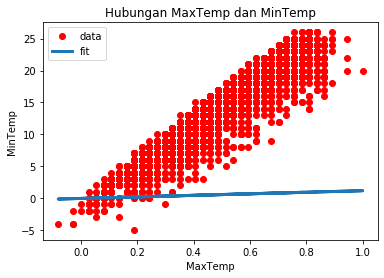

In [27]:
# fungsi
def linier(x, Beta_0, Beta_1):
     y = Beta_0 + Beta_1*x
     return y

popt1, pcov1 = curve_fit(linier, train_x.flatten(), train_y.flatten())
y_hat = linier(Xdata, *popt1)

# plotting
plt.plot(Xdata, y, 'ro', label='data')
plt.plot(Xdata, y_hat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.title("Hubungan MaxTemp dan MinTemp")
plt.ylabel('MinTemp')
plt.xlabel('MaxTemp')
plt.show()

Setelah dilakukan plotting antara data sebenarnya dengan prediksi, didapatkan hasil plotting yang kurang begitu memuaskan karena garis prediksi (warna biru) tidak fit dalam persebaran data yang ada. Fenomena ini disebut dengan istilah <i>underfitting</i>, dimana model kita gagal memberikan hasil yang optimal dalam memodelkan relasi antar 2 variabel tersebut

## Analisis Classification

### Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

feature_names = ['Rain','MaxTemp','MinTemp','AvgWind','AvgHumidity','AvgPressure']
X = data_prepro[feature_names]
Y = data_prepro[['Condition']]

print(data_prepro['Condition'].unique())

# split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# scalling (normalisasi)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# hasil disimpan pada dataframe
classify = pd.DataFrame() # Membuat dataframe untuk menampung hasil

['Partly cloudy' 'Sunny' 'Patchy rain possible' 'Overcast'
 'Heavy rain at times' 'Cloudy' 'Patchy light rain with thunder'
 'Light rain shower' 'Moderate or heavy rain shower'
 'Moderate or heavy rain with thunder' 'Light drizzle' 'Light rain'
 'Light sleet' 'Moderate rain' 'Moderate rain at times'
 'Patchy light drizzle' 'Thundery outbreaks possible'
 'Moderate or heavy sleet' 'Heavy rain' 'Moderate or heavy snow showers'
 'Moderate snow' 'Blizzard' 'Light sleet showers' 'Torrential rain shower'
 'Mist' 'Fog']


### Membangun Models
#### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

classify['LogisticRegression'] = [logreg.score(X_train, Y_train), logreg.score(X_test, Y_test)]

Accuracy of Logistic regression classifier on training set: 0.64
Accuracy of Logistic regression classifier on test set: 0.66


#### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, Y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, Y_test)))

classify['DecisionTree'] = [clf.score(X_train, Y_train), clf.score(X_test, Y_test)]

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.57


#### K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

classify['K-NearestNeighbors'] = [knn.score(X_train, Y_train), knn.score(X_test, Y_test)]

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.63


#### Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,8,4), activation='relu', solver='sgd',
                        max_iter=1000, random_state=80, learning_rate_init=0.001,
                        momentum=0.9)

mlp.fit(X_train, Y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(mlp.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(mlp.score(X_test, Y_test)))

classify['NeuralNetwork'] = [mlp.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.67


#### Support Vector Machine

In [22]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)

print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, Y_test)))

classify['SVM'] = [svm.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of SVM classifier on training set: 0.63
Accuracy of SVM classifier on test set: 0.65


#### Gaussian Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

classify['NaiveBayes'] = [gnb.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of GNB classifier on training set: 0.62
Accuracy of GNB classifier on test set: 0.64


#### Linear Discriminant Analysis

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

classify['LDA'] = [lda.score(X_train, Y_train), mlp.score(X_test, Y_test)]

Accuracy of LDA classifier on training set: 0.64
Accuracy of LDA classifier on test set: 0.66


### Kesimpulan

In [25]:
# visualisasikan dalam tabel
classify.rename(index={0:'Training',1:'Testing'}, inplace=True)
display(classify)

index = classify.idxmax(axis = 1)

print("Classifier terbaik untuk data Train: {}".format(index[0]))
print("Classifier terbaik untuk data Test: {}".format(index[1]))

,LogisticRegression,DecisionTree,K-NearestNeighbors,NeuralNetwork,SVM,NaiveBayes,LDA
Training,0.642301,0.999629,0.720594,0.648237,0.634508,0.618924,0.636364
Testing,0.661846,0.571746,0.630701,0.670745,0.670745,0.670745,0.670745


Classifier terbaik untuk data Train: DecisionTree
Classifier terbaik untuk data Test: NeuralNetwork


__Most Accurate Model: Neural Network Algorithm__<br>
Berdasarkan nilai akurasi percobaan pada training set dan testing set dari masing-masing algoritma, didapatkan nilai paling besar untuk training set ketika menggunakan algoritma Decision Tree sebesar 0.999629, sedangkan nilai paling besar untuk testing set ketika menggunakan algoritma Neural Network sebesar 0.670745.